# 📈 ASTP – Projeto Final
## Previsão de atrasos e cancelamentos de voos nos Estados Unidos, com base em fatores meteorológicos

### 👥 Turma 2
- **Pedro Fonte Santa**, nº 105306  
- **Rafael Alexandre Dias Andorinha**, nº 131000  
- **Vasco Marques**, nº 87526

---

📅 **Data de entrega:** 19 de maio de 2025  

**Objetivo deste Notebook**: Este notebook corresponde ao Objetivo 1 do trabalho. 

Este notebook tem como objetivo realizar uma **análise exploratória das séries meteorológicas** extraídas do dataset *US Weather Events (2016–2022)*.

A análise está centrada nos eventos diários de:
- ❄️ **Cold** (frio extremo abaixo de -23.7º Celsius)
- 🌫️ **Fog** (nevoeiro)
- 🌧️ **Rain** (chuva)
- 🌨️ **Snow** (neve)
- 🌩️ **Storm** (tempestades)

### O que será feito:
- Visualização da evolução temporal dos eventos
- Análise de sazonalidade por média mensal
- Análise de distribuição e testes de normalidade
- Testes de estacionariedade (ADF e KPSS)
- Diferenciação das séries não estacionárias
- Análise de autocorrelação (ACF e PACF)
- Correlação entre as variáveis meteorológicas

Este estudo serve de **base para integrar variáveis climáticas em testes de causalidade de Granger** com as séries de atrasos e cancelamentos de voos.

---

### 🗂️ Datasets:
- [Previsão de estados de Voos (Kaggle)](https://www.kaggle.com/datasets/robikscube/flight-delay-dataset-20182022/data?select=raw)  
- [Eventos Climáticos nos EUA (Kaggle)](https://www.kaggle.com/datasets/sobhanmoosavi/us-weather-events/data)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import kpss

from scipy.stats import normaltest

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (14,6)

### 📂 Carregamento e Visualização dos Dados

In [5]:
# Carregar o dataset meteorológico final
df_clima = pd.read_csv("../../data/weather-events-2018-2022_Final.csv", parse_dates=['Date'])
df_clima.set_index('Date', inplace=True)

# Verificar o início
df_clima.head()

,Cold,Fog,Rain,Snow,Storm
Date,,,,,
2018-01-01,444,651,314,716,17
2018-01-02,422,684,211,619,18
2018-01-03,99,543,543,1097,5
2018-01-04,189,787,406,1408,23
2018-01-05,298,844,544,923,16


In [7]:
# Verificar o fim
df_clima.tail()

,Cold,Fog,Rain,Snow,Storm
Date,,,,,
2022-12-27,70,541,1491,601,54
2022-12-28,59,510,831,734,51
2022-12-29,65,678,904,744,12
2022-12-30,69,1113,2725,812,9
2022-12-31,82,2839,3350,536,9


/var/folders/0n/k3c3l48s6lnbht8rztkmm8f00000gn/T/ipykernel_24871/4017471536.py:12: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()


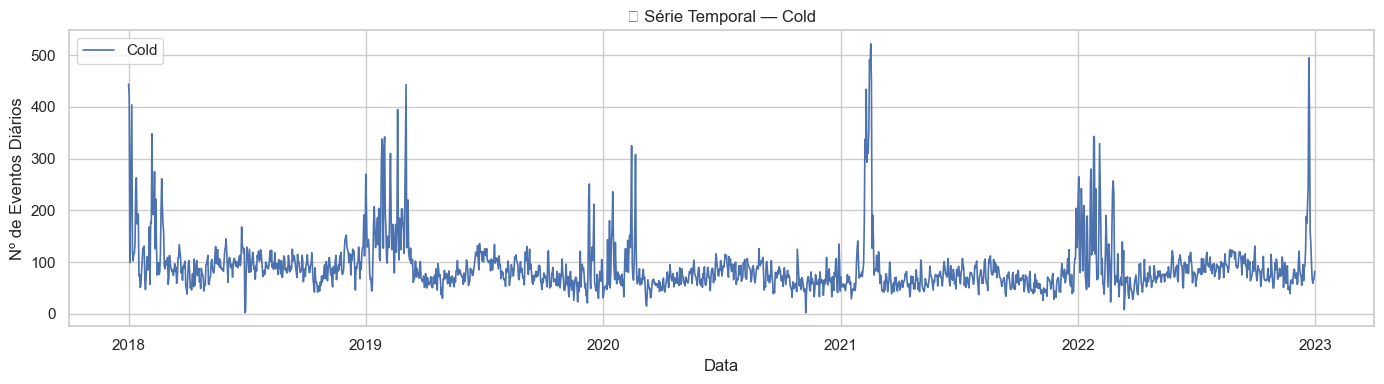

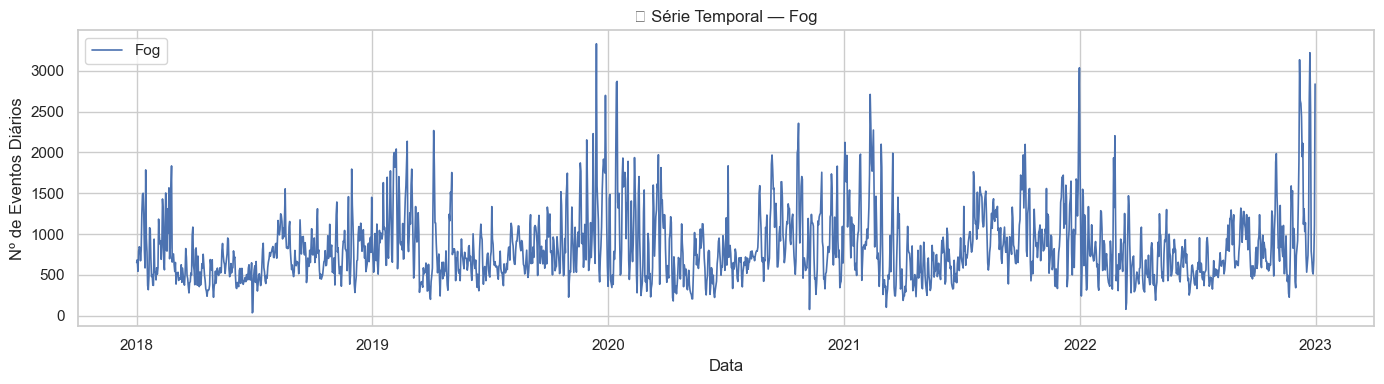

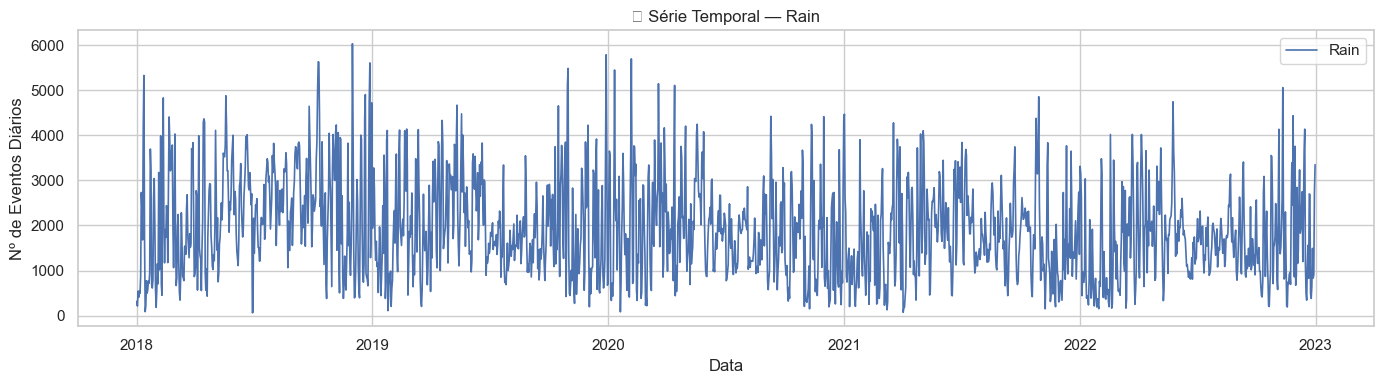

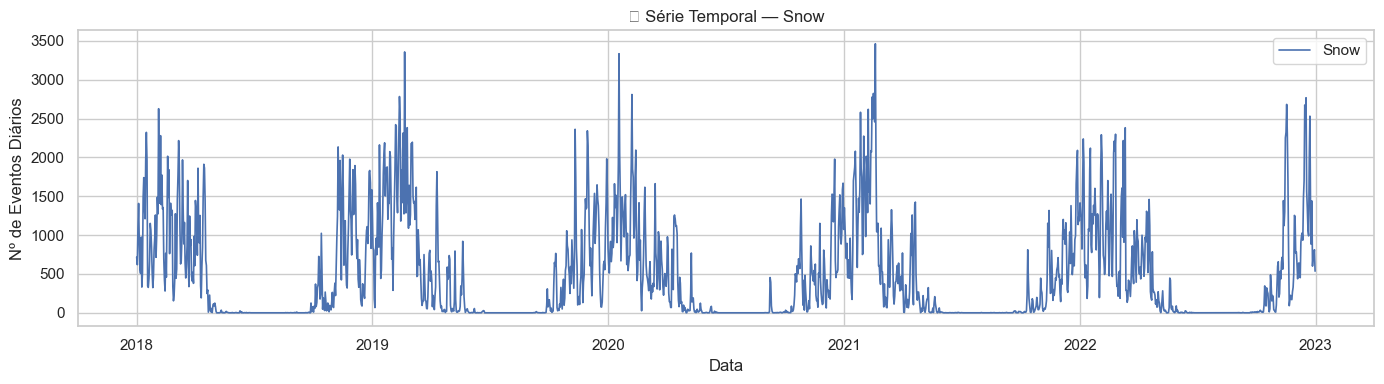

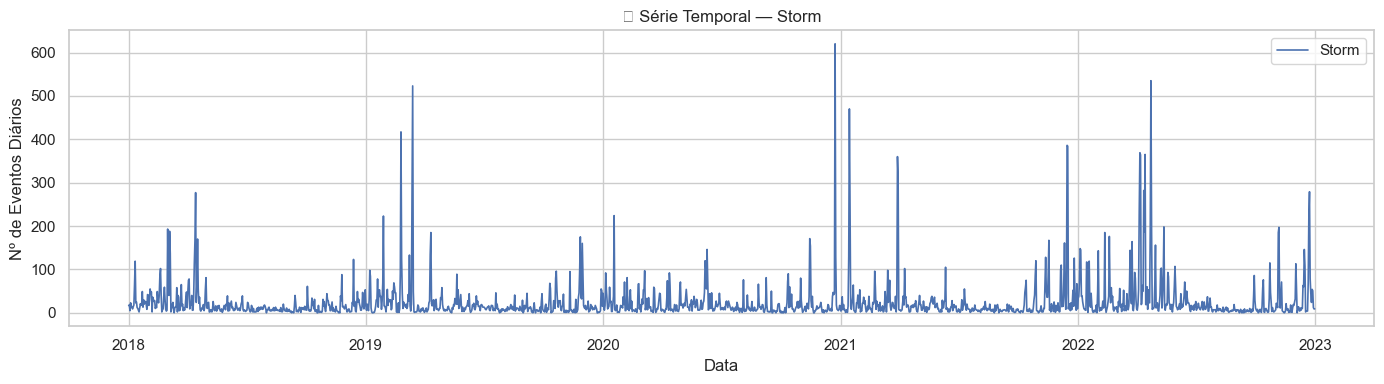

In [ ]:
# Plot individual para cada série
for col in df_clima.columns:
    plt.figure(figsize=(14, 4))
    plt.plot(df_clima.index, df_clima[col], label=col, linewidth=1.2)
    plt.title(f"Série Temporal — {col}")
    plt.xlabel("Data")
    plt.ylabel("Nº de Eventos Diários")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

### 📍 Sazonalidade (Médias Mensais)

Verificamos se há padrão sazonal agrupando por mês.

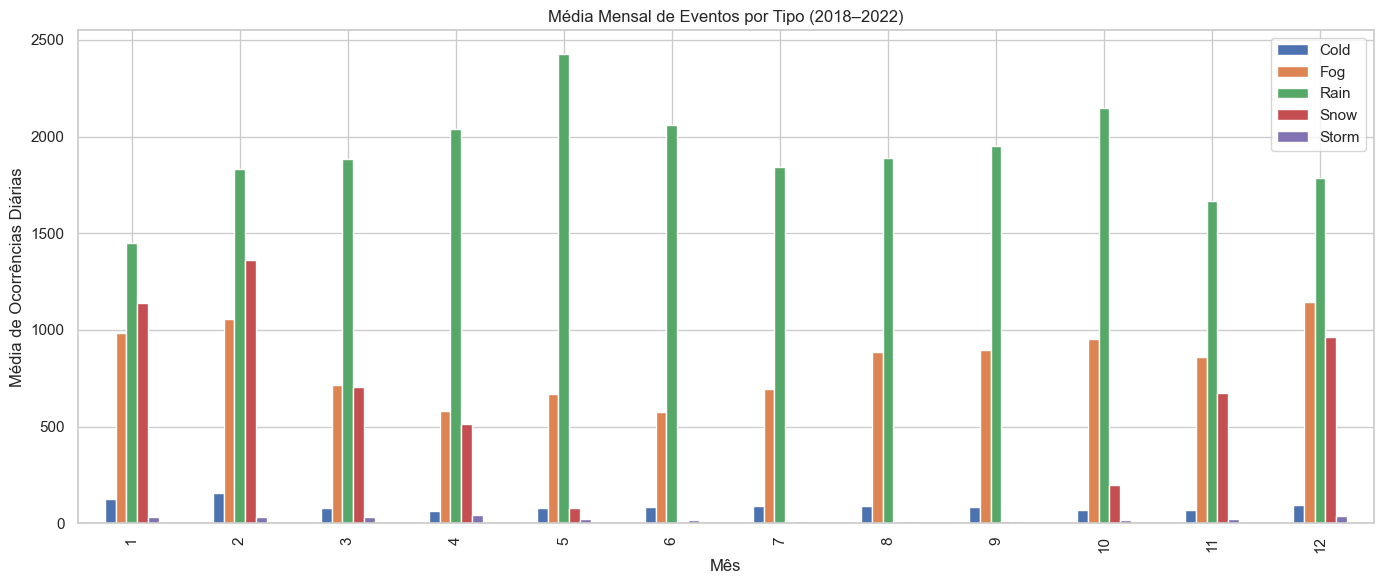

In [11]:
df_clima['Month'] = df_clima.index.month

# Plot de média mensal
monthly_means = df_clima.groupby('Month').mean()

monthly_means.plot(kind='bar', figsize=(14, 6))
plt.title("Média Mensal de Eventos por Tipo (2018–2022)")
plt.xlabel("Mês")
plt.ylabel("Média de Ocorrências Diárias")
plt.grid(True)
plt.tight_layout()
plt.show()

# Remover coluna auxiliar
df_clima.drop(columns='Month', inplace=True)

### 📍 Distribuição e Testes de Normalidade

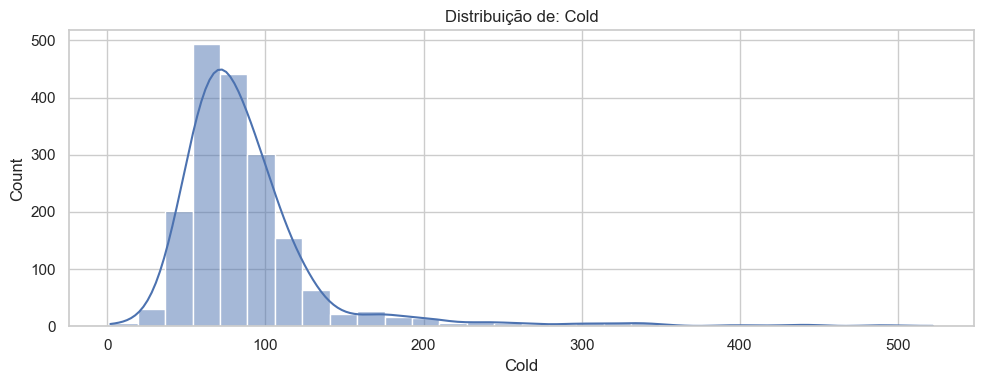

Teste de Normalidade — Cold
Estatística = 1463.21, p-valor = 0.0000
Rejeita-se normalidade



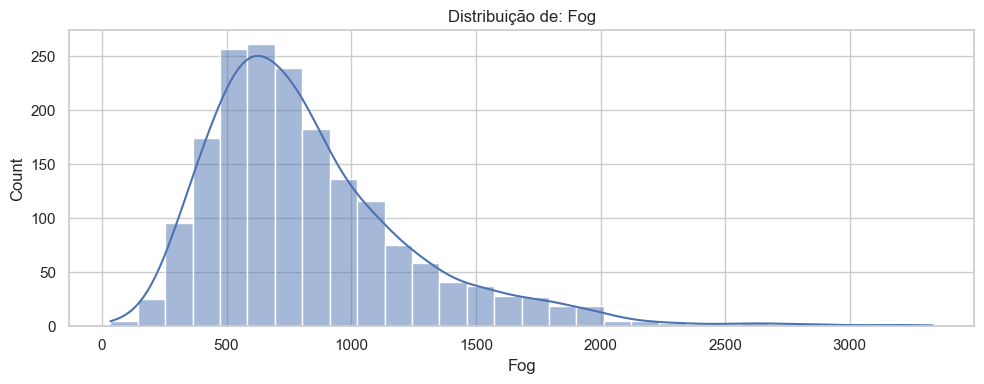

Teste de Normalidade — Fog
Estatística = 571.93, p-valor = 0.0000
Rejeita-se normalidade



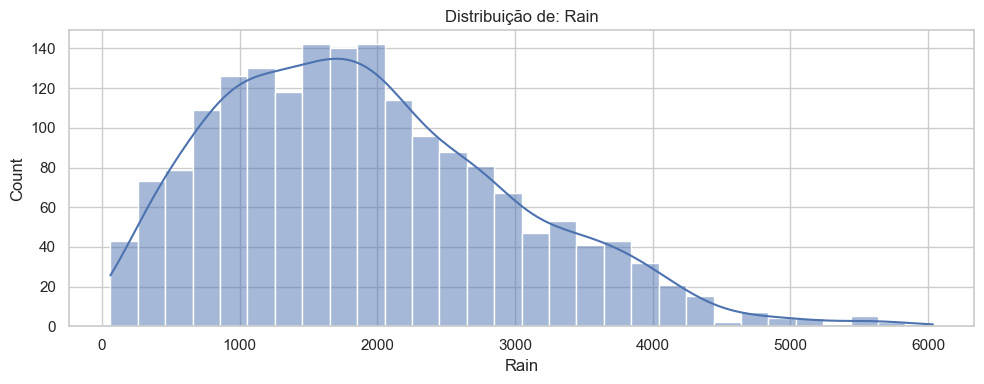

Teste de Normalidade — Rain
Estatística = 108.07, p-valor = 0.0000
Rejeita-se normalidade



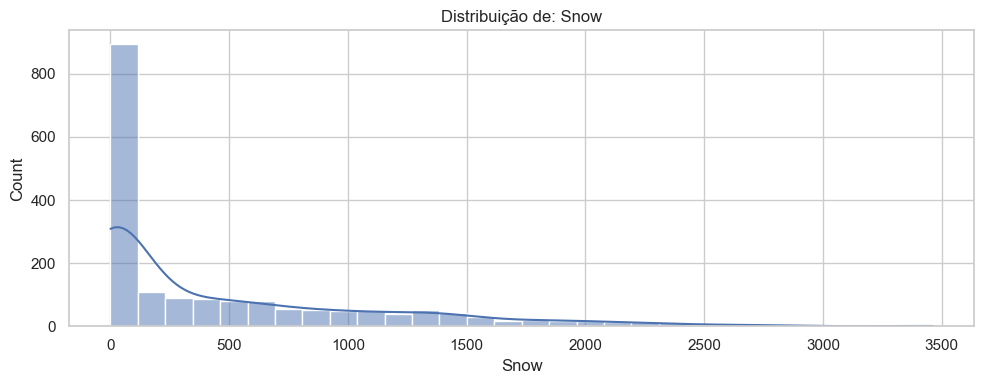

Teste de Normalidade — Snow
Estatística = 464.10, p-valor = 0.0000
Rejeita-se normalidade



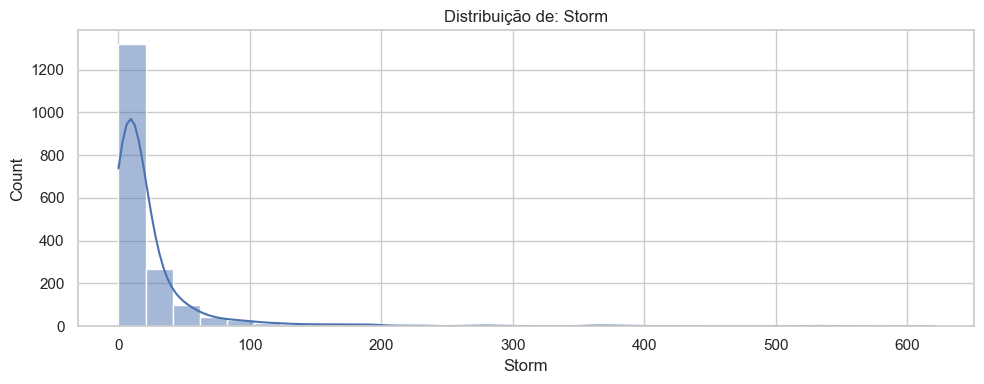

Teste de Normalidade — Storm
Estatística = 2130.87, p-valor = 0.0000
Rejeita-se normalidade



In [13]:
for col in df_clima.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df_clima[col], kde=True, bins=30)
    plt.title(f"Distribuição de: {col}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    stat, p = normaltest(df_clima[col])
    print(f"Teste de Normalidade — {col}")
    print(f"Estatística = {stat:.2f}, p-valor = {p:.4f}")
    if p < 0.05:
        print("Rejeita-se normalidade\n")
    else:
        print("Aceita-se normalidade\n")

### 📉 Testes de Estacionariedade (ADF)

In [15]:
for col in df_clima.columns:
    result = adfuller(df_clima[col])
    print(f"ADF Test — {col}")
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-valor: {result[1]:.4f}")
    if result[1] < 0.05:
        print("Série é estacionária\n")
    else:
        print("Série não é estacionária\n")

ADF Test — Cold
ADF Statistic: -5.8965
p-valor: 0.0000
Série é estacionária

ADF Test — Fog
ADF Statistic: -4.6872
p-valor: 0.0001
Série é estacionária

ADF Test — Rain
ADF Statistic: -6.4169
p-valor: 0.0000
Série é estacionária

ADF Test — Snow
ADF Statistic: -2.9649
p-valor: 0.0383
Série é estacionária

ADF Test — Storm
ADF Statistic: -5.7140
p-valor: 0.0000
Série é estacionária



### 📉 Testes de Estacionariedade (KPSS)

In [16]:
for col in df_clima.columns:
    print(f"KPSS Test — {col}")
    try:
        stat, p, lags, crit = kpss(df_clima[col], regression='c', nlags="auto")
        print(f"KPSS Statistic: {stat:.4f}")
        print(f"p-valor: {p:.4f}")
        if p < 0.05:
            print("Rejeita-se H0 → Série NÃO é estacionária\n")
        else:
            print("Não se rejeita H0 → Série é estacionária\n")
    except Exception as e:
        print(f"Erro no KPSS para {col}: {e}\n")


KPSS Test — Cold
KPSS Statistic: 0.5481
p-valor: 0.0308
Rejeita-se H0 → Série NÃO é estacionária

KPSS Test — Fog
KPSS Statistic: 0.3892
p-valor: 0.0818
Não se rejeita H0 → Série é estacionária

KPSS Test — Rain
KPSS Statistic: 2.2582
p-valor: 0.0100
Rejeita-se H0 → Série NÃO é estacionária

KPSS Test — Snow
KPSS Statistic: 0.1357
p-valor: 0.1000
Não se rejeita H0 → Série é estacionária

KPSS Test — Storm
KPSS Statistic: 0.4413
p-valor: 0.0594
Não se rejeita H0 → Série é estacionária



/var/folders/0n/k3c3l48s6lnbht8rztkmm8f00000gn/T/ipykernel_24871/2666743480.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stat, p, lags, crit = kpss(df_clima[col], regression='c', nlags="auto")
/var/folders/0n/k3c3l48s6lnbht8rztkmm8f00000gn/T/ipykernel_24871/2666743480.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  stat, p, lags, crit = kpss(df_clima[col], regression='c', nlags="auto")


### 🔁 Diferenciar apenas as séries NÃO estacionárias

In [17]:
# Diferenciar apenas as que precisam
df_clima_diff = df_clima.copy()
df_clima_diff['Cold'] = df_clima['Cold'].diff()
df_clima_diff['Rain'] = df_clima['Rain'].diff()

# Remover os primeiros NaN
df_clima_diff = df_clima_diff.dropna()

# Verificação
df_clima_diff.head()

,Cold,Fog,Rain,Snow,Storm
Date,,,,,
2018-01-02,-22.0,684,-103.0,619,18
2018-01-03,-323.0,543,332.0,1097,5
2018-01-04,90.0,787,-137.0,1408,23
2018-01-05,109.0,844,138.0,923,16
2018-01-06,106.0,828,-51.0,569,12


In [18]:
for col in ['Cold', 'Rain']:
    print(f"=== {col} (diferenciada) ===")

    # ADF
    adf_stat, adf_p, *_ = adfuller(df_clima_diff[col])
    print(f"ADF Statistic: {adf_stat:.4f}, p-valor: {adf_p:.4f}")
    if adf_p < 0.05:
        print("ADF: Série é estacionária")
    else:
        print("ADF: Série não é estacionária")

    # KPSS
    try:
        kpss_stat, kpss_p, *_ = kpss(df_clima_diff[col], regression='c', nlags='auto')
        print(f"KPSS Statistic: {kpss_stat:.4f}, p-valor: {kpss_p:.4f}")
        if kpss_p > 0.05:
            print("KPSS: Série é estacionária\n")
        else:
            print("KPSS: Série não é estacionária\n")
    except Exception as e:
        print(f"Erro no KPSS para {col}: {e}\n")


=== Cold (diferenciada) ===
ADF Statistic: -12.8179, p-valor: 0.0000
ADF: Série é estacionária
KPSS Statistic: 0.2056, p-valor: 0.1000
KPSS: Série é estacionária

=== Rain (diferenciada) ===
ADF Statistic: -13.4558, p-valor: 0.0000
ADF: Série é estacionária
KPSS Statistic: 0.0837, p-valor: 0.1000
KPSS: Série é estacionária



/var/folders/0n/k3c3l48s6lnbht8rztkmm8f00000gn/T/ipykernel_24871/3236525552.py:14: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, kpss_p, *_ = kpss(df_clima_diff[col], regression='c', nlags='auto')
/var/folders/0n/k3c3l48s6lnbht8rztkmm8f00000gn/T/ipykernel_24871/3236525552.py:14: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, kpss_p, *_ = kpss(df_clima_diff[col], regression='c', nlags='auto')


### 🔗 Testes de Autocorrelação

🔁 ACF e PACF para Cold


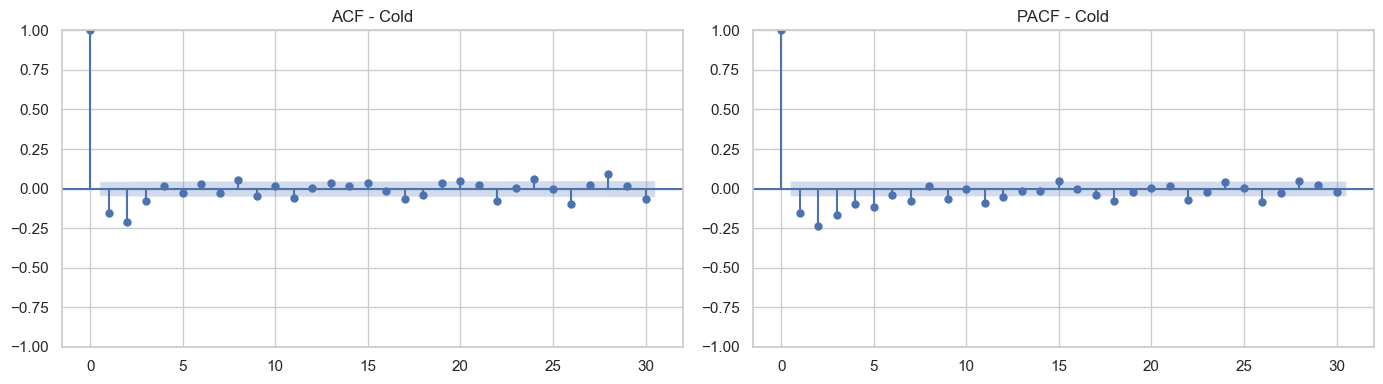

🔁 ACF e PACF para Fog


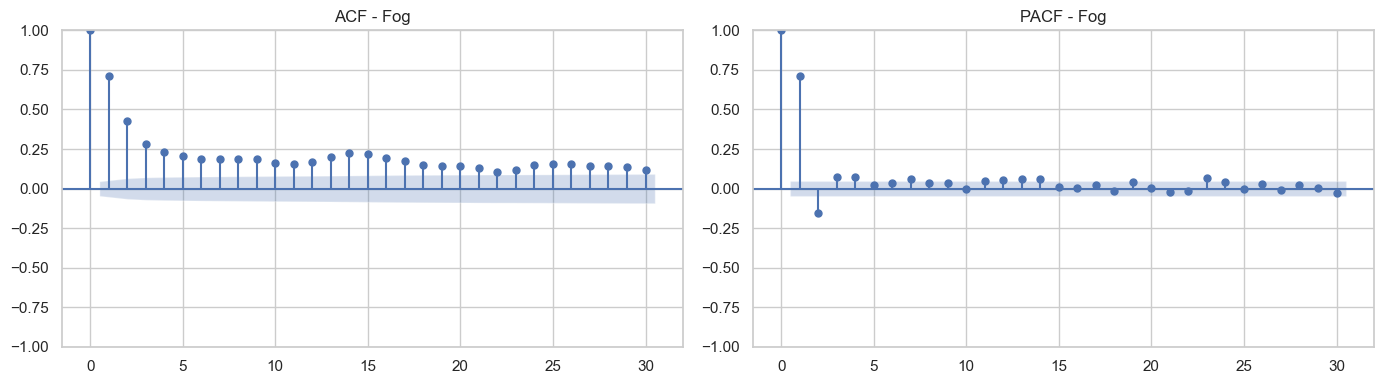

🔁 ACF e PACF para Rain


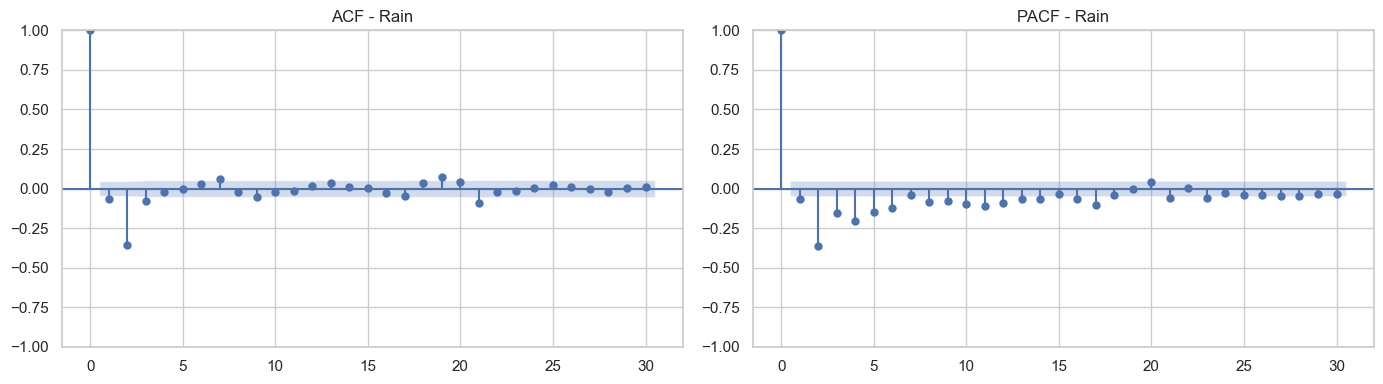

🔁 ACF e PACF para Snow


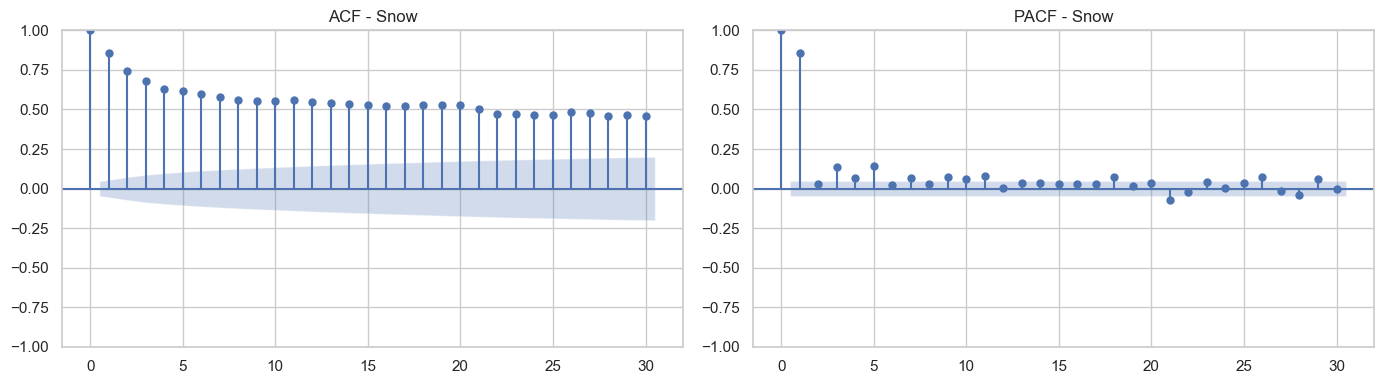

🔁 ACF e PACF para Storm


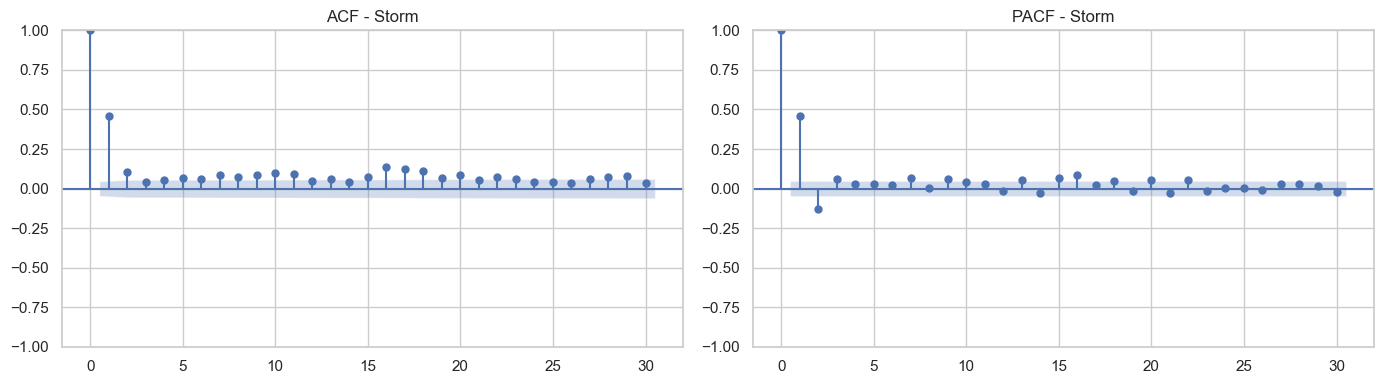

In [ ]:
for col in df_clima_diff.columns:
    print(f" ACF e PACF para {col}")
    fig, ax = plt.subplots(1, 2, figsize=(14, 4))
    plot_acf(df_clima_diff[col], ax=ax[0], lags=30, title=f"ACF - {col}")
    plot_pacf(df_clima_diff[col], ax=ax[1], lags=30, title=f"PACF - {col}")
    plt.tight_layout()
    plt.show()

### 🌦️ Correlação entre Séries Meteorológicas

In [22]:
df_clima_diff.describe().T

,count,mean,std,min,25%,50%,75%,max
Cold,1825.0,-0.198356,37.974644,-323.0,-13.0,0.0,14.0,250.0
Fog,1825.0,833.706849,428.858082,34.0,543.0,739.0,1014.0,3333.0
Rain,1825.0,1.663562,1010.111924,-4669.0,-501.0,34.0,514.0,3610.0
Snow,1825.0,465.817534,629.257934,0.0,0.0,139.0,764.0,3463.0
Storm,1825.0,24.123288,46.689750,0.0,5.0,11.0,23.0,620.0


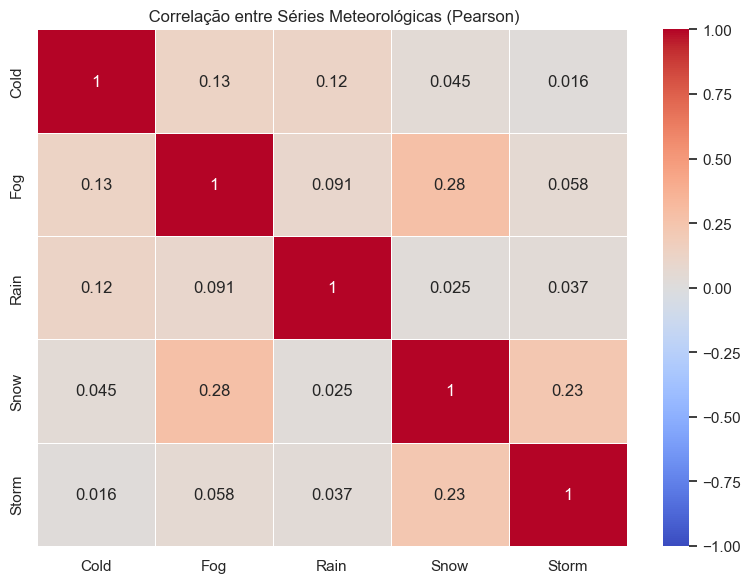

In [21]:
# Calcular a matriz de correlação de Pearson
corr = df_clima_diff.corr(method='pearson')

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title(" Correlação entre Séries Meteorológicas (Pearson)") 
plt.tight_layout()
plt.show()

### Guardar o dataset estacionário para a causalidade

In [31]:
# Carregar o dataset dos voos com Atrasos já diferenciados
df_voos = pd.read_csv("../../data/causality-dataset-2018-2022_Final.csv", parse_dates=['FlightDate'])
df_voos.set_index('FlightDate', inplace=True)

# Garantir que o índice do clima está ok
df_clima_diff.index = pd.to_datetime(df_clima_diff.index)

# Juntar clima ao dataset de voos
df_final = df_voos.join(df_clima_diff, how='inner')

# Verificar
print(df_final.head())

            Atrasos  Cancelamentos   Cold  Fog   Rain  Snow  Storm
2018-01-02    -54.0            110  -22.0  684 -103.0   619     18
2018-01-03   -701.0            449 -323.0  543  332.0  1097      5
2018-01-04  -1533.0           3001   90.0  787 -137.0  1408     23
2018-01-05   1482.0           1007  109.0  844  138.0   923     16
2018-01-06   -827.0            234  106.0  828  -51.0   569     12


In [32]:
# Verificar
print(df_final.tail())

            Atrasos  Cancelamentos  Cold  Fog   Rain  Snow  Storm
2022-07-27   -953.0            212  18.0  673 -140.0     0      2
2022-07-28    376.0            610  -7.0  480  -76.0     0      7
2022-07-29    219.0            294   8.0  492 -241.0     0      7
2022-07-30   -971.0            256 -25.0  572 -254.0     0      7
2022-07-31    829.0            482  10.0  493  354.0     0      7


In [33]:
# Salvar df_final para a analise de causalidade
df_final.to_csv("../../data/causality-dataset-2018-2022_Final.csv")
print(" O ficheiro foi sobrescrito com sucesso com df_final.")

 O ficheiro foi sobrescrito com sucesso com df_final.


### ✅ O que Concluímos – Análise Exploratória das Séries Meteorológicas

A análise permitiu compreender o comportamento das séries de eventos climáticos entre 2018 e 2022:

- As séries apresentam **padrões sazonais marcados**, como o aumento de `Snow` no inverno e a sua redução no verão.
- Nenhuma série segue uma **distribuição normal**, justificando o uso de métodos estatísticos não paramétricos.
- Em termos de estacionariedade:
  - `Fog`, `Snow` e `Storm` são **estacionárias por natureza**.
  - `Cold` e `Rain` **tornaram-se estacionárias após diferenciação**, conforme os testes ADF e KPSS.
- A autocorrelação confirmou **dependência temporal relevante**, suportando o uso de lags nos testes de causalidade.

#### Relações entre variáveis
- A matriz de correlação revelou **fraca correlação entre os diferentes tipos de eventos climáticos**, sugerindo que cada variável representa um fenómeno distinto.
- Apesar da expectativa, não se verificou forte correlação entre `Rain` e `Storm`, indicando que:
  - Os eventos podem ocorrer em **locais diferentes**;
  - Têm **frequência distinta**;
  - `Storm` inclui fenómenos como vento forte ou trovoadas **sem precipitação direta**.

Esta independência justifica o uso das variáveis meteorológicas como **explicativas separadas** nos testes de causalidade, sem risco de multicolinearidade.

O dataset final com todas as séries estacionárias foi guardado para análise causal:
`causality-dataset-2018-2022_Final.csv`